# Neural Networks: MNIST Handwritten Digit Classification 

## Step 1: Load Data and Data Exploration

We'll be using the pre-labeled [**MNIST dataset**](https://en.wikipedia.org/wiki/MNIST_database), which contains 70,000 grayscale images of handwritten digits, along with their corresponding digit labels. 

Since we want our model to be able to perform well in the real world on **previously unseen data**, we'll only train it on 60,000 images, and then evaluate our model on the remaining 10,000.

In [76]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist

# Import MNIST Dataset from Keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [77]:
# your code here
num_train = len(X_train)
num_test = len(X_test)

In [78]:
### BEGIN_HIDDEN_TEST
assert num_train == 60000
assert num_test == 10000
### END_HIDDEN_TEST

In [79]:
# What features are given for each example? (Answer: 28 x 28 pixel image)
print("Shape of one example: " + str(X_train[0].shape)) 

# What do our labels look like? (Answer: 0-9 digit corresponding to image)
print("Labels: ", y_train)

Shape of one example: (28, 28)
Labels:  [5 0 4 ... 5 6 8]


5


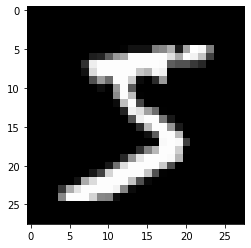

In [80]:
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Change this number and re-run the cell to see different image samples!
sample_num = 0

plt.imshow(X_train[sample_num], cmap=plt.get_cmap('gray'))
print(y_train[sample_num])
plt.show()

## Step 2: Data Preprocessing

* **Flatten** the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in the 784-dimensional input layer of our neural network.
* **Normalize** the pixel values from 0-255 to 0-1. We can do this by simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values, so this normalization is a pretty common first step in most deep learning tasks.
* **Categorize** the outputs into 10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image (e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just the digit number itself. We want our training labels to match up with our neural network output. These categorized vectors contain all 0's, except a 1 in the location indicating which digit the image corresponds to.

In [81]:
# your code here
num_pixels = X_train.shape[1] * X_train.shape[2] # 28 *28 = 784

In [82]:
### BEGIN_HIDDEN_TEST
assert num_pixels == 784
### END_HIDDEN_TEST

In [83]:
# We need to flatten 28*28 images to a 784 vector for each image
# Store the flattened train set into a variable called 'X_train_flattened'.
# Store the flattened test set into a variable called 'X_test_flattened'.

X_train_flattened = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
X_test_flattened = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [84]:
### BEGIN_HIDDEN_TEST
assert X_train_flattened.shape == (60000, 784)
assert X_test_flattened.shape == (10000, 784)
### END_HIDDEN_TEST

In [85]:
# your code here
X_train_flattened = X_train_flattened / 255.
X_test_flattened = X_train_flattened / 255

In [86]:
### BEGIN_HIDDEN_TEST
assert X_train_flattened[100][100] == 0.0
assert X_test_flattened[103][109] == 0.0
### END_HIDDEN_TEST

In [87]:
# Categorize the outputs ("one-hot" vectors)
import tensorflow as tf

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

# What does the first label look like after one-hot encoding?
print(y_train[0], y_train_categorical[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step 3: Create Neural Network Model

1. **Initialize** the network, add desired layers. The settings we decide to use, e.g. number of layers, number of neurons per layer, are called **hyperparameters**, and have to be tuned by hand, rather than learned via gradient descent.
2. **Compile** the network to get ready for training. This tells the network what cost/loss function to use ("cost" and "loss" are used interchangeably), and what type of gradient descent to use.
3. **Training** the network, using the training images. This actually feeds the training data into the network, and uses gradient descent and backpropagation to adjust the network's weights in order to minimize the cost function.

**Keras Resources**:
* [Getting Started](https://keras.io/) 
* Sequential Model [Overview](https://keras.io/getting-started/sequential-model-guide/)
* Sequential Model [Documentation](https://keras.io/models/sequential/) 
* [Core Layers](https://keras.io/layers/core/) 
* [Activation Functions](https://keras.io/activations/)
* [Cost/Loss Functions](https://keras.io/losses)
* [Optimizers](https://keras.io/optimizers) 


In [89]:
# your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [90]:
### BEGIN_HIDDEN_TEST
assert model.get_weights()[1][10] == 0.0
assert len(model.get_weights()[-1]) == 10
### END_HIDDEN_TEST

In [91]:
# 2 -- Network Compilation

# Compile. Loss function: categorical crossentropy. Optimizer: stochastic gradient descent (SGD). Metrics: 'accuracy'
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [92]:
# 3 -- Network Training

# Number of epochs: 10 (i.e. how many times to loop over the training data)
# Batch size: 16 (how big our "random walk" samples should be)

model.fit(X_train_flattened, y_train_categorical, epochs=1, batch_size=16)

Train on 60000 samples
60000/60000 [==============================] - 14s 238us/sample - loss: 0.4878 - accuracy: 0.8666


## Step 4: Evaluation & Predictions

In [94]:
# your code here
loss_and_metrics = model.evaluate(X_test_flattened, y_test_categorical, batch_size=128, verbose=0)

cost_final = loss_and_metrics[0]
test_accuracy = loss_and_metrics[1]

print("final cost:", cost_final)
print("final test accuracy", test_accuracy)

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 10000 target samples.

In [ ]:
### BEGIN_HIDDEN_TESTS
assert True
### END HIDDEN_TESTS

**Final Sanity Check:** Make sure the our neural network's predictions match up with the actual images

Output vector:  [0.08689184 0.1399457  0.07601979 0.08659791 0.08512089 0.17513743
 0.08867756 0.13431469 0.05461454 0.0726797 ]
Predicted digit:  5


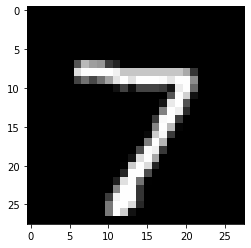

In [95]:
# Pick a random test sample and see what the model predicts! 
sample_num = 0 

import numpy as np

test_sample = np.expand_dims(X_test_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print("Output vector: ", predicted_scores[0]) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print("Predicted digit: ", predicted_class) # print predicted classification

# Show actual input image
plt.imshow(X_test[sample_num], cmap=plt.get_cmap('gray'))
plt.show()

## Congrats! You just did deep learning!

### Additional Resources:

* [3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk) Videos 
* ML Cheatsheet for [Activation Functions](http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) 
* ML Cheatsheet for [Cost/Loss Functions](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
* Michael Nielsen [Free Online Book](http://neuralnetworksanddeeplearning.com) 